# **Image Classification using Convolutional Neural Networks (CNNs)**



**Dataset Source** : https://www.kaggle.com/datasets/puneet6060/intel-image-classification

**About Dataset**  

The dataset comprises image data capturing natural scenes from various locations worldwide. It contains approximately **25,000** images, each sized 150x150 pixels, categorized into six distinct classes:

- Buildings (category 0)
- Forest (category 1)
- Glacier (category 2)
- Mountain (category 3)
- Sea (category 4)
- Street (category 5)

The dataset is divided into three main subsets: Train, Test, and Prediction. Each subset is stored in separate zip files. Specifically, there are about 14,000 images in the Train set, 3,000 images in the Test set, and 7,000 images in the Prediction set.

This dataset provides a diverse collection of natural scene images, making it suitable for various computer vision tasks such as image classification, object detection, and scene recognition.

# **1. Import the Required Libraries**

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
!pip install --upgrade keras

In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.16.1
Keras version: 3.2.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Uploading Kaggle API token (kaggle.json)
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!kaggle datasets download -d puneet6060/intel-image-classification

Saving kaggle.json to kaggle.json
 99% 343M/346M [00:09<00:00, 42.6MB/s]
100% 346M/346M [00:09<00:00, 36.9MB/s]


In [ ]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

# **2. Data Preprocessing**

**i. Get the Image Dataset Paths**

In [ ]:
train_dataset_path = '/content/seg_train/seg_train'
validation_dataset_path = '/content/seg_test/seg_test'

**ii. Load Image Datasets and Apply Augmentations**

In [ ]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

***Loading the training dataset and applying augmentations on it***

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,  # Normalize pixel values
                                  zoom_range=0.2,    # Zoom in or out by up to 20%
                                  width_shift_range=0.2,    # Shift images horizontally by up to 20% of the width
                                  height_shift_range=0.2,   # Shift images vertically by up to 20% of the height
                                  fill_mode='nearest')      # Fill in missing pixels with the nearest value
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 14034 images belonging to 6 classes.


***Loading the validation dataset***

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 3000 images belonging to 6 classes.


**iii. Get the Label Mappings**

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : buildings
1 : forest
2 : glacier
3 : mountain
4 : sea
5 : street


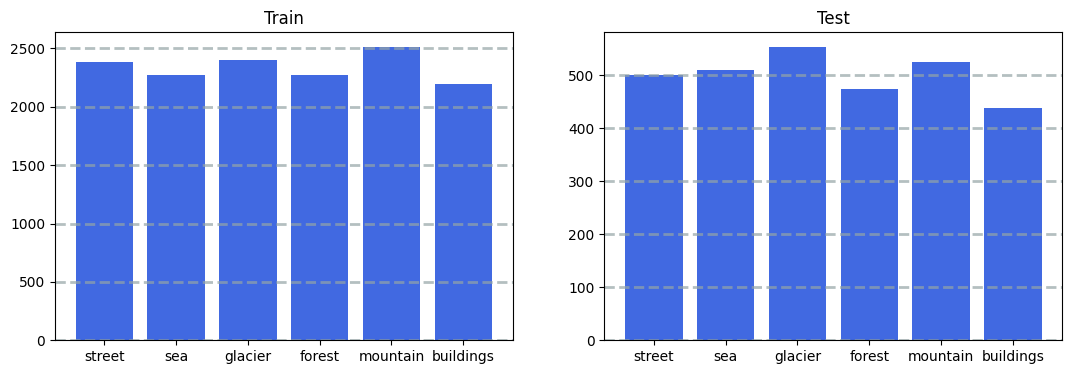

In [ ]:
# Showing classes of images and distribution of images in train and test datasets
cat = os.listdir(train_dataset_path)
num_train = {}
num_test = {}

for c in cat:
    num_train[c] = len(os.listdir(train_dataset_path + "/" + c))
    num_test[c] = len(os.listdir(validation_dataset_path + "/" + c))


fig = plt.figure(figsize=(13, 4))
t = ('Train', 'Test')
for i, d in enumerate((num_train, num_test), start=1):
    plt.subplot(1, 2, i)
    plt.bar(tuple(d.keys()), tuple(d.values()), color='royalblue')
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.title(t[i-1])
plt.show()



# **3. Data Visualization**

**1. Plotting Sample Training Images**

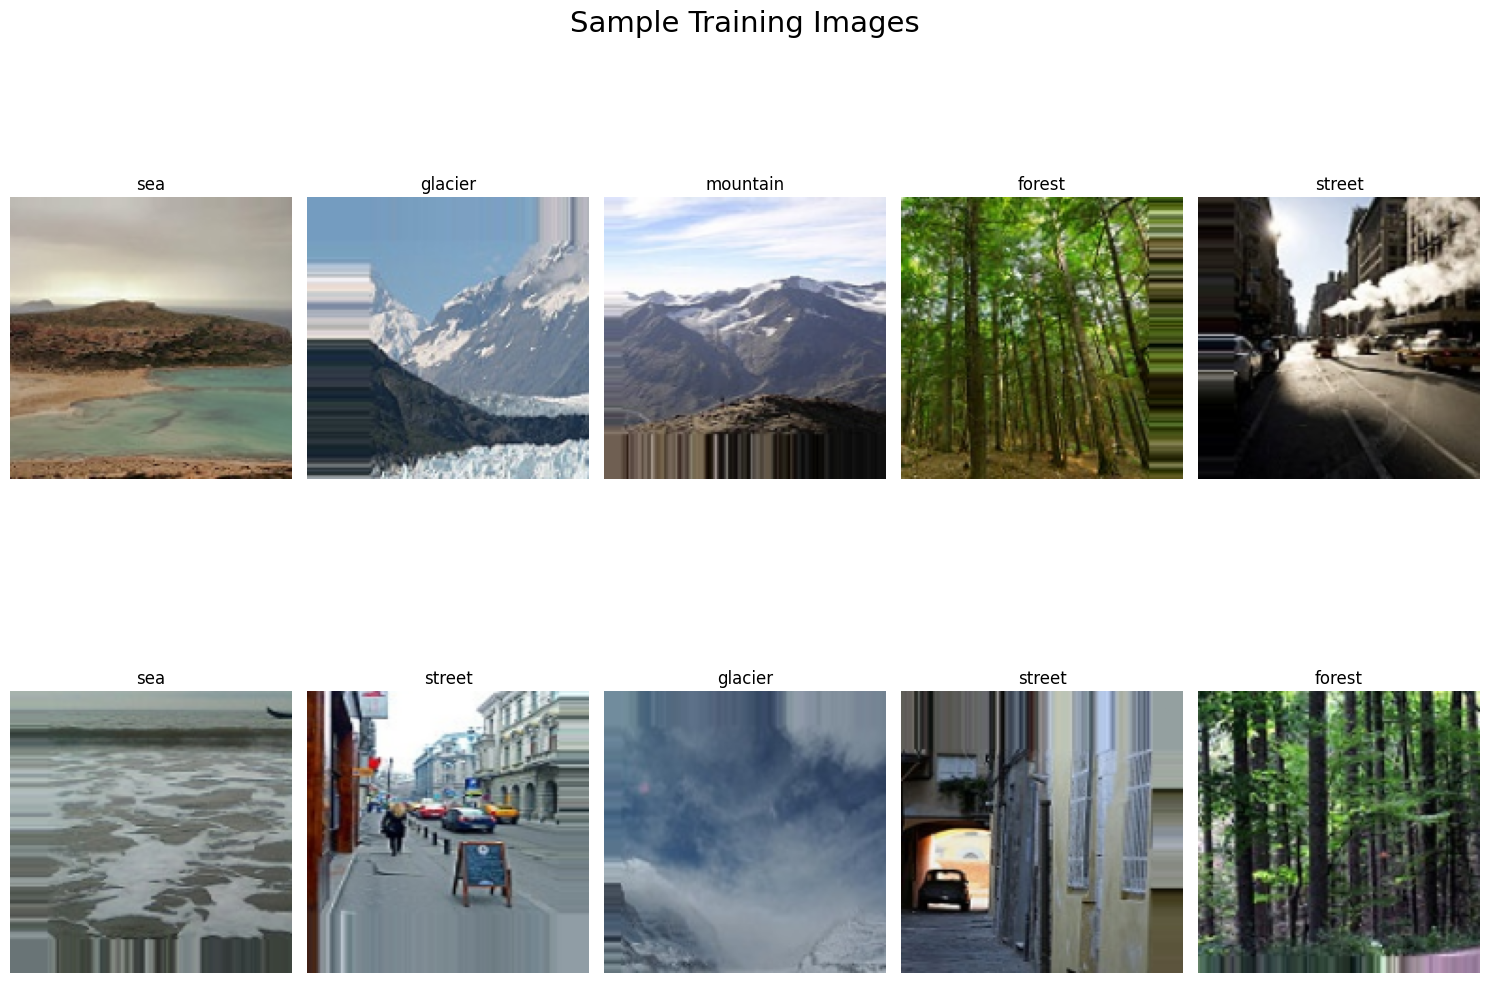

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

# **4. Training a CNN Model**

**i. Create a CNN Model**

In [ ]:
def create_model():       # Defining the model
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),

        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])

    return model

In [ ]:
cnn_model = create_model()   # Creating the model

In [ ]:
print(cnn_model.summary())   # Printing the model summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 146, 146, 128)       │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 146, 146, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 71, 71, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 71, 71, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 35, 35, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 33, 33, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 33, 33, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,201,830 (8.40 MB)

 Trainable params: 2,201,382 (8.40 MB)

 Non-trainable params: 448 (1.75 KB)

None


**ii. Reduce Learning Rate on Plateau**

This is a callback object and is used to reduce the learning rate when a metric has stopped improving

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

**iii. Defining the Optimizer**

In [ ]:
optimizer = Adam(learning_rate=0.001)

**iv. Compile the Model**

In [ ]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

**v. Training the Model**

In [ ]:
history = cnn_model.fit(train_generator, epochs=20, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/20
439/439 - 92s - 211ms/step - accuracy: 0.5030 - loss: 2.0269 - val_accuracy: 0.5950 - val_loss: 1.0636 - learning_rate: 0.0010
Epoch 2/20
439/439 - 78s - 177ms/step - accuracy: 0.6094 - loss: 1.0719 - val_accuracy: 0.6940 - val_loss: 0.8679 - learning_rate: 0.0010
Epoch 3/20
439/439 - 75s - 172ms/step - accuracy: 0.6658 - loss: 0.9229 - val_accuracy: 0.5867 - val_loss: 1.0439 - learning_rate: 0.0010
Epoch 4/20
439/439 - 76s - 173ms/step - accuracy: 0.7060 - loss: 0.8251 - val_accuracy: 0.7493 - val_loss: 0.7131 - learning_rate: 0.0010
Epoch 5/20
439/439 - 76s - 174ms/step - accuracy: 0.7223 - loss: 0.7732 - val_accuracy: 0.7017 - val_loss: 0.8229 - learning_rate: 0.0010
Epoch 6/20
439/439 - 76s - 174ms/step - accuracy: 0.7309 - loss: 0.7624 - val_accuracy: 0.8043 - val_loss: 0.5591 - learning_rate: 0.0010
Epoch 7/20
439/439 - 74s - 169ms/step - accuracy: 0.7492 - loss: 0.7185 - val_accuracy: 0.7900 - val_loss: 0.6623 - learning_rate: 0.0010
Epoch 8/20
439/439 - 74s - 169ms/s

**It took 24 minutes to train the CNN model**

**vi. Plotting training and validation accuracy, loss and learning rate**

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['learning_rate']

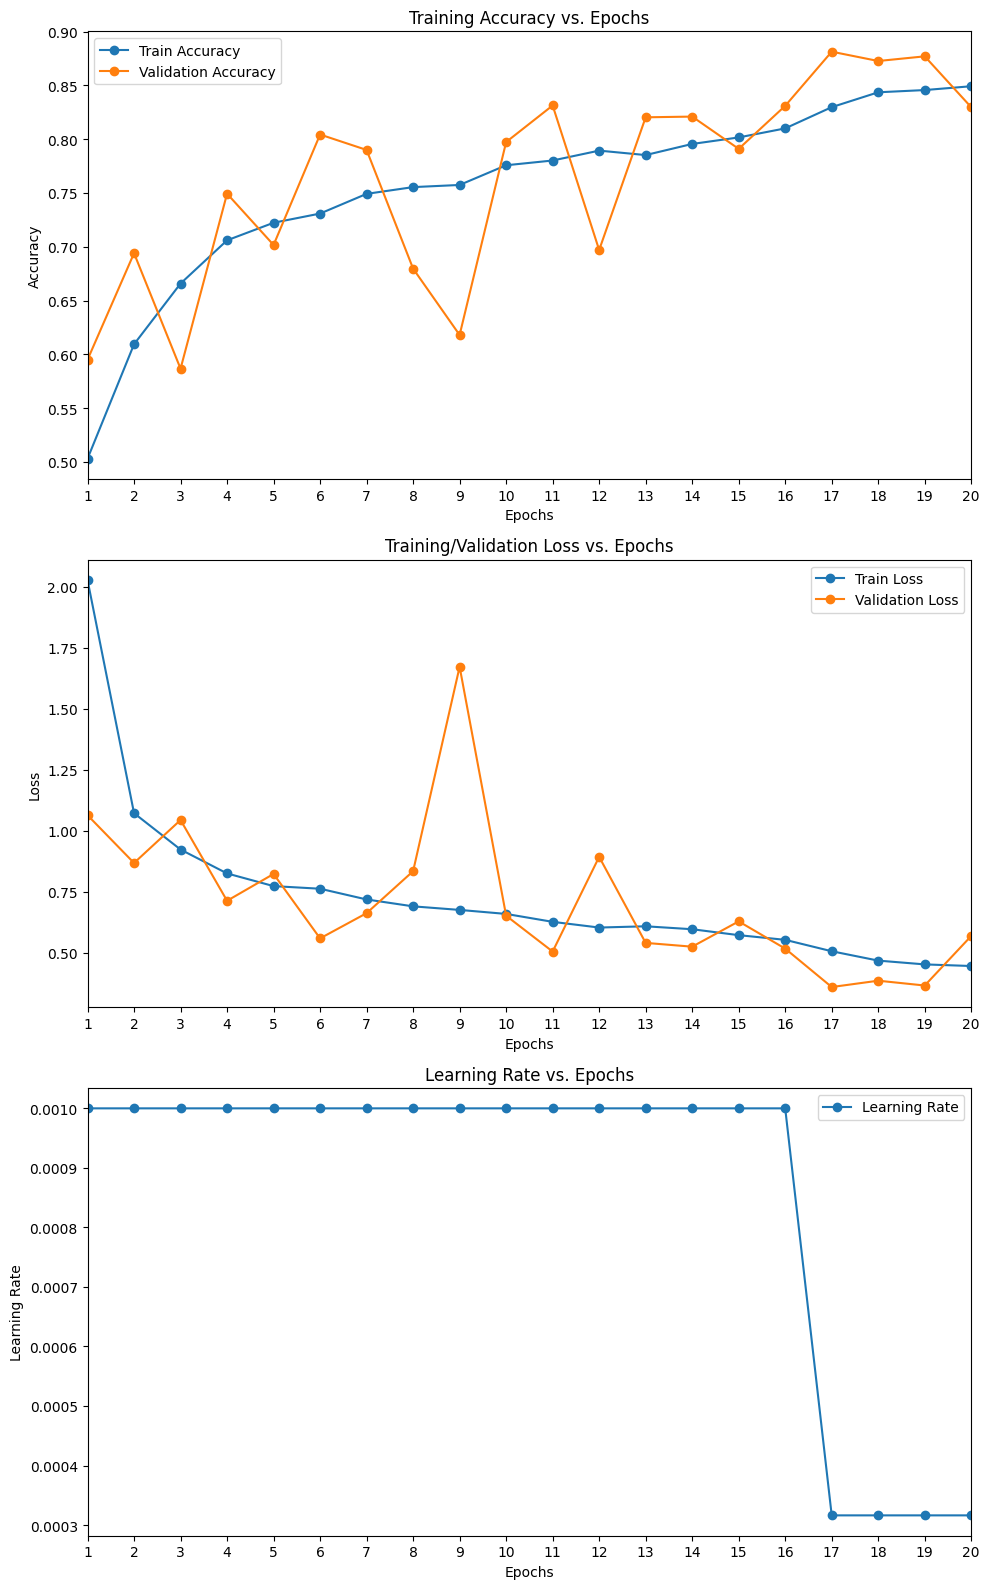

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['learning_rate']

epochs = range(1, len(train_accuracy) + 1)  # epochs start from 1

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 16))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(epochs, train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(epochs, val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')
ax[0].set_xlim(1, len(train_accuracy))  # start from epoch 1
ax[0].set_xticks(range(1, len(train_accuracy) + 1, 1))

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(epochs, train_loss, 'o-', label='Train Loss')
ax[1].plot(epochs, val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')
ax[1].set_xlim(1, len(train_accuracy))  # start from epoch 1
ax[1].set_xticks(range(1, len(train_accuracy) + 1, 1))

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(epochs, learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Learning Rate')
ax[2].legend(loc='best')
ax[2].set_xlim(1, len(train_accuracy))  # start from epoch 1
ax[2].set_xticks(range(1, len(train_accuracy) + 1, 1))

plt.tight_layout()
plt.show()


# **5. Evaluation**

**Testing the Model on Test Set**

In [ ]:
test_dataset = '/content/seg_test/seg_test/'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 3000 images belonging to 6 classes.


**Model Prediction on the Test Dataset**

In [ ]:
predictions = cnn_model.predict(test_generator)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


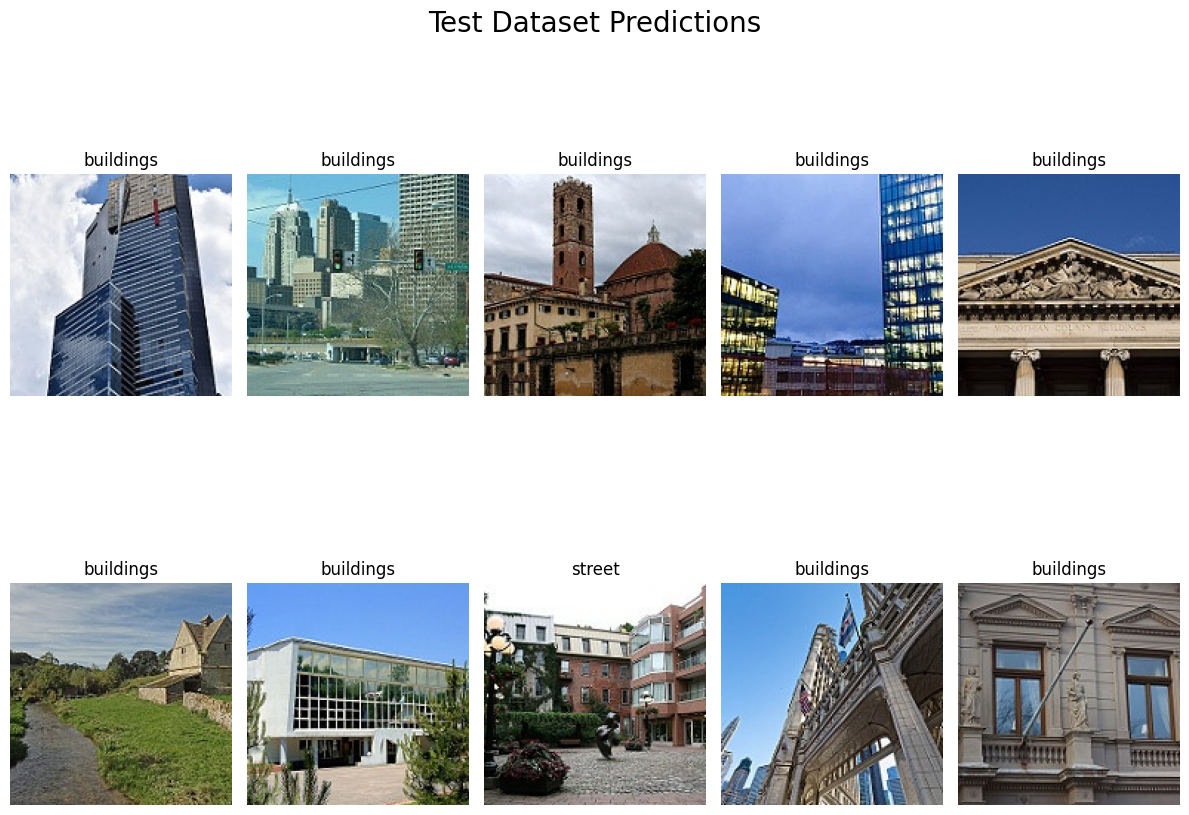

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))   # Plotting the test data predictions
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8425 - loss: 0.4940


In [ ]:
print(f"Test Loss:     {test_loss}")      # Printing the test loss and test accuracy
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.569036066532135
Test Accuracy: 0.8296666741371155


**Plotting the Classification Metrics**

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

   buildings       0.73      0.84      0.78       437
      forest       0.94      0.98      0.96       474
     glacier       0.85      0.75      0.79       553
    mountain       0.87      0.66      0.75       525
         sea       0.78      0.87      0.82       510
      street       0.83      0.91      0.87       501

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



**Confusion Matrix**

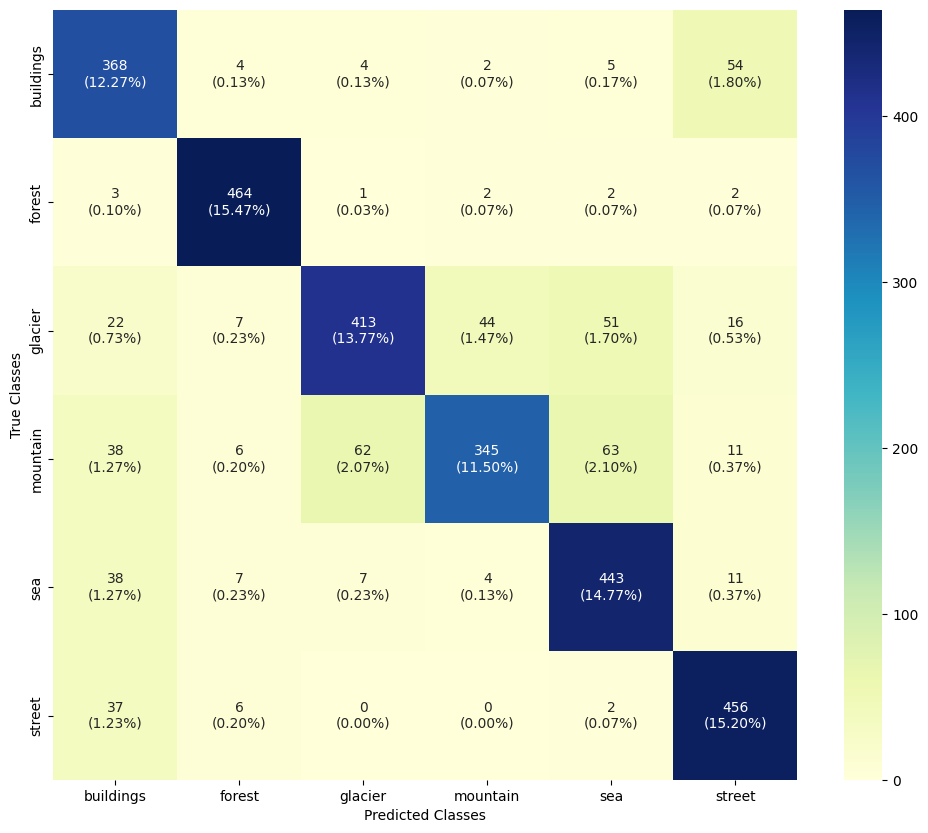

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)    # Plotting the confusion matrix

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

# **6. Results Interpretation**

**Exploring misclassified images**

In [ ]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [ ]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

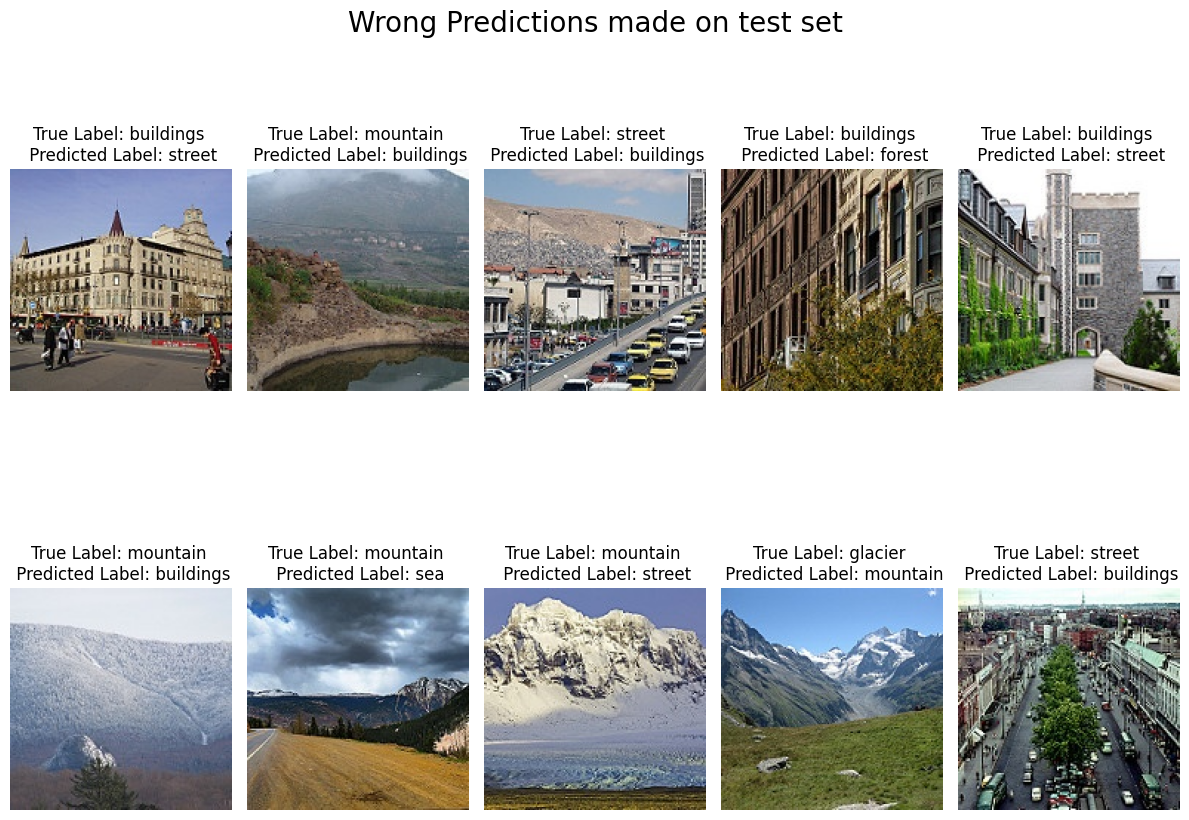

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_dataset, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

**Findings:**

Test Loss: 0.488, indicating that, on average, the model's predictions are reasonably close to the actual values.

Test Accuracy: 0.830, suggesting that the model performs well, correctly classifying approximately 83% of the test data.

Precision, Recall, and F1-score: These metrics provide insights into the performance of the model for each class. Some classes like buildings and glacier have slightly lower precision and recall compared to others, indicating room for improvement.

## **7.Create pickle files for trained CNN model and preprocessing objects**

In [ ]:
import pickle

# Save trained CNN model
cnn_model.save('cnn_model.h5')

# Save labels dictionary
with open('labels.pickle', 'wb') as handle:
    pickle.dump(labels, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save ImageDataGenerator configuration
with open('train_datagen.pickle', 'wb') as handle:
    pickle.dump(train_datagen, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save test_generator filenames
with open('test_generator_filenames.pickle', 'wb') as handle:
    pickle.dump(test_generator.filenames, handle, protocol=pickle.HIGHEST_PROTOCOL)


# **8.Data Preparation for Logistic Regression and Decision Tree Models**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern, hog
from skimage.filters import sobel, gaussian
from skimage.exposure import histogram

In [ ]:
# Load features and labels using Pickle
with open('/content/clf_train_features.pkl', 'rb') as f:
    features = pickle.load(f)

with open('/content/clf_train_labels.pkl', 'rb') as f:
    labels = pickle.load(f)

In [ ]:
def extract_features(image):
    # Convert image to grayscale
    gray_image = rgb2gray(image)

    # Apply Gaussian blur to smooth the image
    smoothed_image = gaussian(gray_image, sigma=1)

    # Local Binary Pattern for texture
    lbp = local_binary_pattern(smoothed_image, P=16, R=2, method='uniform')
    lbp_hist, _ = np.histogram(lbp, density=True, bins=np.arange(0, 18), range=(0, 17))

    # Sobel Edge Detection to capture edges
    edge_sobel = sobel(smoothed_image)
    edge_hist, _ = np.histogram(edge_sobel, density=True, bins=10)

    # Histogram of Oriented Gradients (HOG) for shape and texture
    # Note the use of `channel_axis=-1` to specify that the input is a color image
    hog_features, _ = hog(image, orientations=8, pixels_per_cell=(16, 16),
                          cells_per_block=(1, 1), visualize=True, multichannel=True, channel_axis=-1)

    # Color histogram in the RGB space
    color_hist = np.concatenate([np.histogram(image[:, :, i], bins=32, range=(0, 1), density=True)[0]
                                 for i in range(3)])  # Ensure the range is over all three channels if RGB

    # Combine features
    combined_features = np.concatenate((lbp_hist, edge_hist, hog_features, color_hist))
    return combined_features

In [ ]:
# Initialize storage for features and labels
features = []
labels = []
current_batch = 0

In [ ]:
from math import ceil

def process_batch(x_batch):
    # Process each image in the batch individually
    return np.array([extract_features(image) for image in x_batch])

# Calculate the total number of batches
total_batches = ceil(train_generator.samples / train_generator.batch_size)

In [ ]:
# Extract features from all images
for x_batch, y_batch in train_generator:
    batch_features = process_batch(x_batch)  # Process each image in the batch
    features.append(batch_features)
    labels.append(y_batch)

    current_batch += 1  # Increment the current batch count
    print(f"Processed batch {current_batch} out of {total_batches}")

    # Stop the loop after the last batch
    if current_batch >= total_batches:
        break

<ipython-input-8-174dcffabe6e>:18: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, _ = hog(image, orientations=8, pixels_per_cell=(16, 16),


Processed batch 1 out of 439
Processed batch 2 out of 439
Processed batch 3 out of 439
Processed batch 4 out of 439
Processed batch 5 out of 439
Processed batch 6 out of 439
Processed batch 7 out of 439
Processed batch 8 out of 439
Processed batch 9 out of 439
Processed batch 10 out of 439
Processed batch 11 out of 439
Processed batch 12 out of 439
Processed batch 13 out of 439
Processed batch 14 out of 439
Processed batch 15 out of 439
Processed batch 16 out of 439
Processed batch 17 out of 439
Processed batch 18 out of 439
Processed batch 19 out of 439
Processed batch 20 out of 439
Processed batch 21 out of 439
Processed batch 22 out of 439
Processed batch 23 out of 439
Processed batch 24 out of 439
Processed batch 25 out of 439
Processed batch 26 out of 439
Processed batch 27 out of 439
Processed batch 28 out of 439
Processed batch 29 out of 439
Processed batch 30 out of 439
Processed batch 31 out of 439
Processed batch 32 out of 439
Processed batch 33 out of 439
Processed batch 34 

In [ ]:
# Convert list to numpy arrays
features = np.vstack(features)
labels = np.vstack(labels)

In [ ]:
# Convert one-hot encoded labels to integer labels
integer_labels = np.argmax(labels, axis=1)

# Now integer_labels contains integer values from 0 to 5, each representing a class
print(integer_labels.shape)

(14034,)


# **9.Train Logistic Regression Model**

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Convert one-hot encoded labels to integer labels
integer_labels = np.argmax(labels, axis=1)

# Assuming 'features' is array of extracted features and 'integer_labels' are labels
X_train, X_test, y_train, y_test = train_test_split(features, integer_labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predict on the test set
y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

# Calculate accuracy for training
accuracy_train_log_reg = accuracy_score(y_train, y_pred_train)
print(f"Accuracy for training: {accuracy_train_log_reg}")

# Calculate accuracy for testing
accuracy_test_log_reg = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for testing: {accuracy_test_log_reg}")

# Calculate other metrics
precision_lr = precision_score(y_test, y_pred_test, average='weighted')
recall_lr = recall_score(y_test, y_pred_test, average='weighted')
f1_lr= f1_score(y_test, y_pred_test, average='weighted')
class_report_lr = classification_report(y_test, y_pred_test)  # Remove average='weighted'

print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")
print("Classification Report:\n", class_report_lr)


Accuracy for training: 0.7840919212612452
Accuracy for testing: 0.6583541147132169
Precision: 0.6577111522267143
Recall: 0.6583541147132169
F1 Score: 0.657681999378986
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.63      0.65       431
           1       0.89      0.92      0.91       454
           2       0.59      0.59      0.59       480
           3       0.53      0.57      0.55       488
           4       0.58      0.54      0.56       470
           5       0.70      0.71      0.71       484

    accuracy                           0.66      2807
   macro avg       0.66      0.66      0.66      2807
weighted avg       0.66      0.66      0.66      2807



**Hyper parameter tuning done for L1, L2 and elastic Net, but no any performance incresement.**
for elastic net - to find best hyper parameter tuning, it took around one hour and crashed.

# **10. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion='gini',          # Metric used for splitting (alternative: 'entropy')
    splitter='best',           # Strategy used to choose the split at each node (alternative: 'random')
    max_depth=20,              # Maximum depth of the tree to limit tree size and prevent overfitting
    min_samples_split=20,      # Minimum number of samples required to split an internal node
    min_samples_leaf=10,       # Minimum number of samples required to be at a leaf node
    max_features=None,         # Number of features to consider when looking for the best split; None means all features
    max_leaf_nodes=None,       # Maximum number of leaf nodes (None means unlimited)
    min_impurity_decrease=0.01,# A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    random_state=42            # Ensures the same results are produced each time the model is run
)
# Fit the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0.01,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

# Calculate accuracy for training
accuracy_train_dt = accuracy_score(y_train, y_pred_train)
print(f"Accuracy for training: {accuracy_train_dt}")

# Calculate accuracy for testing
accuracy_test_dt = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for testing: {accuracy_test_dt}")

# Calculate other metrics
precision_dt = precision_score(y_test, y_pred_test, average='weighted')
recall_dt = recall_score(y_test, y_pred_test, average='weighted')
f1_dt= f1_score(y_test, y_pred_test, average='weighted')
class_report_dt = classification_report(y_test, y_pred_test)

print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")
print("Classification Report:\n", class_report_dt)


Accuracy for training: 0.44909592945577625
Accuracy for testing: 0.4346277164232277
Precision: 0.4088810115915435
Recall: 0.4346277164232277
F1 Score: 0.40972820708332475
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.21      0.22       431
           1       0.66      0.76      0.71       454
           2       0.24      0.07      0.11       480
           3       0.36      0.51      0.42       488
           4       0.49      0.44      0.46       470
           5       0.47      0.60      0.53       484

    accuracy                           0.43      2807
   macro avg       0.41      0.43      0.41      2807
weighted avg       0.41      0.43      0.41      2807



## Model Tunning

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
features_reduced = pca.fit_transform(features)

In [ ]:
# Check how many features are retained
print("Reduced feature dimensions:", features_reduced.shape)

Reduced feature dimensions: (14034, 61)


In [ ]:
# Assuming 'integer_labels' is already generated from one-hot labels as previously described
X_train, X_test, y_train, y_test = train_test_split(features_reduced, labels, test_size=0.2, random_state=42)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,  # The number of trees in the forest
    criterion='gini',  # Metric used for splitting (alternative: 'entropy')
    max_depth=None,    # Maximum depth of each tree. None means no limit, which might cause overfitting
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    max_features='auto',  # The number of features to consider when looking for the best split; 'auto' means sqrt(n_features)
    random_state=42,  # Ensures the same results are produced each time the model is run
    n_jobs=-1,        # Use all processors for training
    verbose=1         # Controls verbosity of process
)


In [ ]:
rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


RandomForestClassifier(max_features='auto', n_jobs=-1, random_state=42,
                       verbose=1)

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred_test = rf_clf.predict(X_test)
y_pred_train = rf_clf.predict(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [ ]:
# Calculate accuracy for training
accuracy_train_rf = accuracy_score(y_train, y_pred_train)
print(f"Accuracy for training: {accuracy_train_rf}")

# Calculate accuracy for testing
accuracy_test_rf = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for testing: {accuracy_test_rf}")

# Calculate other metrics
precision_rf = precision_score(y_test, y_pred_test, average='weighted')
recall_rf = recall_score(y_test, y_pred_test, average='weighted')
f1_rf = f1_score(y_test, y_pred_test, average='weighted')
class_report_rf = classification_report(y_test, y_pred_test)  # Remove average='weighted'

print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print("Classification Report:\n", class_report_rf)


Accuracy for training: 1.0
Accuracy for testing: 0.1923762023512647
Precision: 0.8348217421523807
Recall: 0.1923762023512647
F1 Score: 0.26704143432119637
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.01      0.03       431
           1       0.94      0.67      0.78       454
           2       0.82      0.12      0.20       480
           3       0.72      0.05      0.09       488
           4       0.93      0.08      0.15       470
           5       0.76      0.23      0.36       484

   micro avg       0.87      0.19      0.32      2807
   macro avg       0.84      0.19      0.27      2807
weighted avg       0.83      0.19      0.27      2807
 samples avg       0.19      0.19      0.19      2807



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model is over fitting on training data, creating another random forest model with max_depth set to 10 to reduce overfitting

### Second Iteration

In [ ]:
rf_clf_2 = RandomForestClassifier(
    n_estimators=100,  # The number of trees in the forest
    criterion='gini',  # Metric used for splitting (alternative: 'entropy')
    max_depth=10,    # Maximum depth of each tree. None means no limit, which might cause overfitting
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    max_features='auto',  # The number of features to consider when looking for the best split; 'auto' means sqrt(n_features)
    random_state=42,  # Ensures the same results are produced each time the model is run
    n_jobs=-1,        # Use all processors for training
    verbose=1         # Controls verbosity of process
)


In [ ]:
rf_clf_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished


RandomForestClassifier(max_depth=10, max_features='auto', n_jobs=-1,
                       random_state=42, verbose=1)

In [ ]:
# Predict on the test set
y_pred_test = rf_clf_2.predict(X_test)
y_pred_train = rf_clf_2.predict(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for training
accuracy_train_rf2 = accuracy_score(y_train, y_pred_train)
print(f"Accuracy for training: {accuracy_train_rf2}")

# Calculate accuracy for testing
accuracy_test_rf2 = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for testing: {accuracy_test_rf2}")

# Calculate other metrics
precision_rf_2 = precision_score(y_test, y_pred_test, average='weighted')
recall_rf_2 = recall_score(y_test, y_pred_test, average='weighted')
f1_rf_2 = f1_score(y_test, y_pred_test, average='weighted')
class_report_rf_2 = classification_report(y_test, y_pred_test)  # Remove average='weighted'

print(f"Precision: {precision_rf_2}")
print(f"Recall: {recall_rf_2}")
print(f"F1 Score: {f1_rf_2}")
print("Classification Report:\n", class_report_rf_2)

Accuracy for training: 0.3137970962857397
Accuracy for testing: 0.14463840399002495
Precision: 0.7211732505215358
Recall: 0.14463840399002495
F1 Score: 0.1973403710339356
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       431
           1       0.93      0.65      0.76       454
           2       0.85      0.06      0.11       480
           3       0.76      0.03      0.05       488
           4       0.91      0.04      0.09       470
           5       0.81      0.10      0.18       484

   micro avg       0.90      0.14      0.25      2807
   macro avg       0.71      0.15      0.20      2807
weighted avg       0.72      0.14      0.20      2807
 samples avg       0.14      0.14      0.14      2807



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

# Initialize storage for features and labels
validation_features = []
validation_labels = []
v_current_batch = 0

# Calculate the total number of batches
v_total_batches = ceil(validation_generator.samples / validation_generator.batch_size)

Found 3000 images belonging to 6 classes.


## Models Evaluation on Validation Set

In [ ]:
# Extract features from all images
for x_batch, y_batch in validation_generator:
    batch_features = process_batch(x_batch)  # Process each image in the batch
    validation_features.append(batch_features)
    validation_labels.append(y_batch)

    v_current_batch += 1  # Increment the current batch count
    print(f"Processed batch {v_current_batch} out of {v_total_batches}")

    # Stop the loop after the last batch
    if v_current_batch >= v_total_batches:
        break

<ipython-input-8-174dcffabe6e>:18: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, _ = hog(image, orientations=8, pixels_per_cell=(16, 16),


Processed batch 1 out of 94
Processed batch 2 out of 94
Processed batch 3 out of 94
Processed batch 4 out of 94
Processed batch 5 out of 94
Processed batch 6 out of 94
Processed batch 7 out of 94
Processed batch 8 out of 94
Processed batch 9 out of 94
Processed batch 10 out of 94
Processed batch 11 out of 94
Processed batch 12 out of 94
Processed batch 13 out of 94
Processed batch 14 out of 94
Processed batch 15 out of 94
Processed batch 16 out of 94
Processed batch 17 out of 94
Processed batch 18 out of 94
Processed batch 19 out of 94
Processed batch 20 out of 94
Processed batch 21 out of 94
Processed batch 22 out of 94
Processed batch 23 out of 94
Processed batch 24 out of 94
Processed batch 25 out of 94
Processed batch 26 out of 94
Processed batch 27 out of 94
Processed batch 28 out of 94
Processed batch 29 out of 94
Processed batch 30 out of 94
Processed batch 31 out of 94
Processed batch 32 out of 94
Processed batch 33 out of 94
Processed batch 34 out of 94
Processed batch 35 out 

In [ ]:
# Convert list to numpy arrays
features_v = np.vstack(validation_features)
labels_v = np.vstack(validation_labels)

# Convert one-hot encoded labels to integer labels
integer_labels_v = np.argmax(labels_v, axis=1)

In [ ]:
# Check the shapes of your features and labels
print(f'Shape of features_v: {features_v.shape}')
print(f'Shape of labels_v: {labels_v.shape}')
print(f'Shape of integer_labels_v: {integer_labels_v.shape}')

Shape of features_v: (33800, 771)
Shape of labels_v: (33800, 6)
Shape of integer_labels_v: (33800,)


In [ ]:
# Reduce the dimensionality of the features
validation_features_reduced = pca.transform(features_v)

# Check the shape of the reduced features
print(f'Shape of validation_features_reduced: {validation_features_reduced.shape}')

Shape of validation_features_reduced: (33800, 61)


In [ ]:
# Make predictions with clf
validation_predictions_clf = clf.predict(features_v)

# Check the shape of the predictions
print(f'Shape of validation_predictions_clf: {validation_predictions_clf.shape}')

# Make predictions with rf_clf
if validation_features_reduced.ndim > 1 and validation_features_reduced.shape[0] > 1:
    validation_predictions_rf_clf = rf_clf.predict(validation_features_reduced)
    print(f'Shape of validation_predictions_rf_clf: {validation_predictions_rf_clf.shape}')
else:
    print('validation_features_reduced is not a 2D array with more than one row, skipping predictions with rf_clf')

# Make predictions with rf_clf_2
if validation_features_reduced.ndim > 1 and validation_features_reduced.shape[0] > 1:
    validation_predictions_rf_clf_2 = rf_clf_2.predict(validation_features_reduced)
    print(f'Shape of validation_predictions_rf_clf_2: {validation_predictions_rf_clf_2.shape}')
else:
    print('validation_features_reduced is not a 2D array with more than one row, skipping predictions with rf_clf_2')

Shape of validation_predictions_clf: (33800,)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


Shape of validation_predictions_rf_clf: (33800, 6)
Shape of validation_predictions_rf_clf_2: (33800, 6)


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [ ]:
# Convert multi-label predictions to integer labels
integer_predictions_rf_clf = np.argmax(validation_predictions_rf_clf, axis=1)
integer_predictions_rf_clf_2 = np.argmax(validation_predictions_rf_clf_2, axis=1)

# Now can compute your metrics
precision_rf_clf = precision_score(integer_labels_v, integer_predictions_rf_clf, average='weighted')
recall_rf_clf = recall_score(integer_labels_v, integer_predictions_rf_clf, average='weighted')
f1_rf_clf = f1_score(integer_labels_v, integer_predictions_rf_clf, average='weighted')

precision_rf_clf_2 = precision_score(integer_labels_v, integer_predictions_rf_clf_2, average='weighted')
recall_rf_clf_2 = recall_score(integer_labels_v, integer_predictions_rf_clf_2, average='weighted')
f1_rf_clf_2 = f1_score(integer_labels_v, integer_predictions_rf_clf_2, average='weighted')


In [ ]:
# Print the metrics for rf_clf
print(f'Precision for rf_clf: {precision_rf_clf}')
print(f'Recall for rf_clf: {recall_rf_clf}')
print(f'F1 Score for rf_clf: {f1_rf_clf}')

# Print a newline for readability
print()

# Print the metrics for rf_clf_2
print(f'Precision for rf_clf_2: {precision_rf_clf_2}')
print(f'Recall for rf_clf_2: {recall_rf_clf_2}')
print(f'F1 Score for rf_clf_2: {f1_rf_clf_2}')


Precision for rf_clf: 0.756861915709715
Recall for rf_clf: 0.35798816568047337
F1 Score for rf_clf: 0.35132659837288854

Precision for rf_clf_2: 0.7996863396988565
Recall for rf_clf_2: 0.3042603550295858
F1 Score for rf_clf_2: 0.2755684952245147


# **Comparison of Model performances**

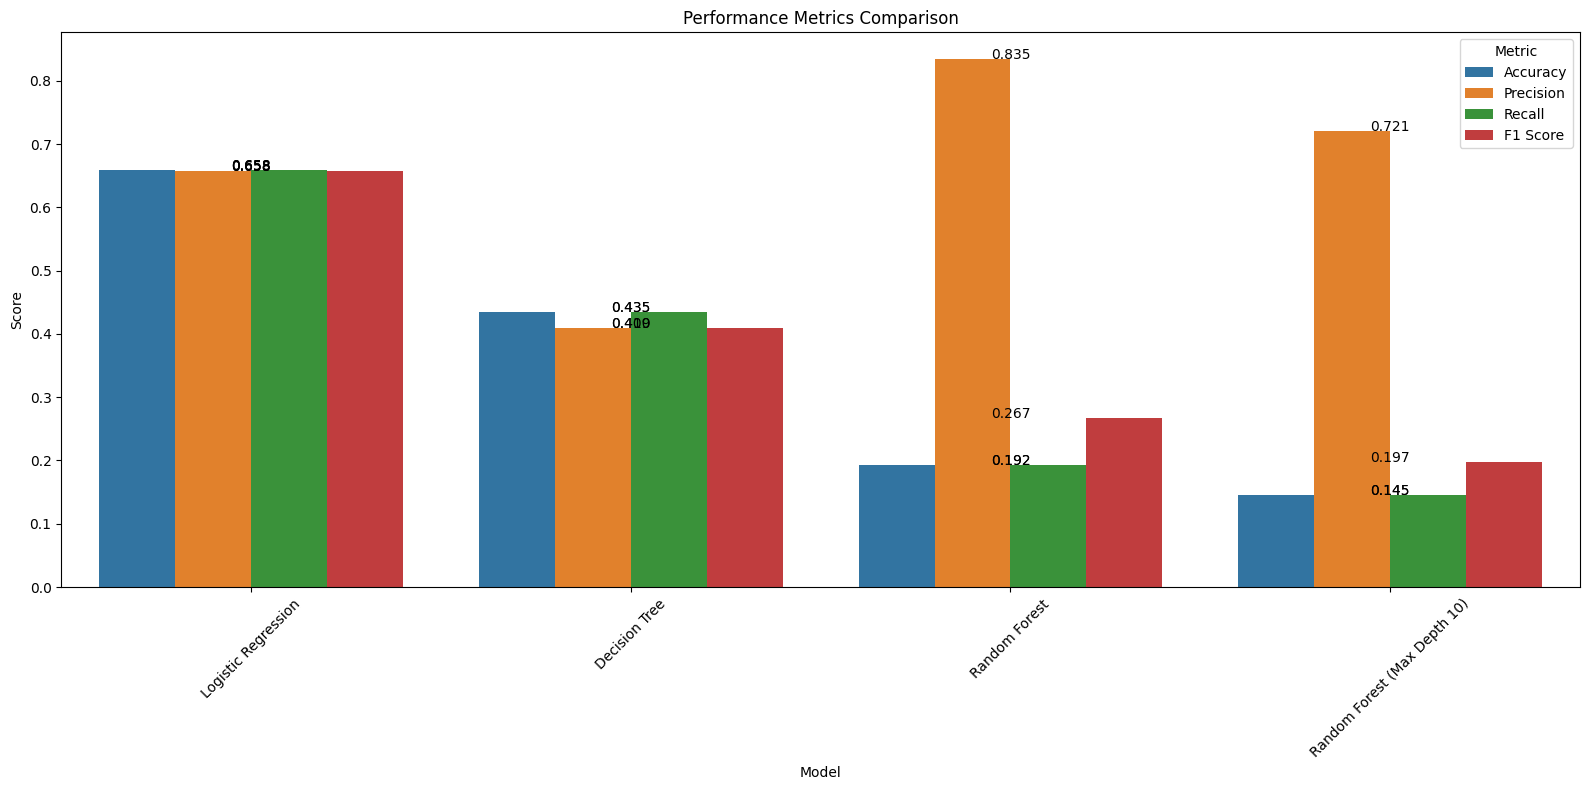

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define models and their performance metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Random Forest (Max Depth 10)']
accuracy = [accuracy_test_log_reg, accuracy_test_dt, accuracy_test_rf, accuracy_test_rf2]
precision = [precision_lr, precision_dt, precision_rf, precision_rf_2]
recall = [recall_lr, recall_dt, recall_rf, recall_rf_2]
f1 = [f1_lr, f1_dt, f1_rf, f1_rf_2]

# Create DataFrame for easier plotting
performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Melt the DataFrame for seaborn plotting
performance_df_melted = performance_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot the performance metrics using seaborn
plt.figure(figsize=(16, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=performance_df_melted)

# Add annotations to each bar
for index, row in performance_df.iterrows():
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
        plt.text(index, row[metric], f'{row[metric]:.3f}', color='black', ha="center")

plt.title('Performance Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()
